### #3

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [24]:
def Q(x):
    return abs(x - 6)

a = 0
b = 10
sigma = 1
epsilon = 0.01
theta = 0.62

In [25]:
def dichotomy(Q, a, b, sigma):

    df = pd.DataFrame(columns=["a", "c", "b", "x", "y", "Qx", "Qc", "Qy"])

    c = (a + b) / 2
    Qc = Q(c)
    while (b - a) > sigma:
        x = (a + c) / 2
        Qx = Q(x)
        y = (c + b) / 2
        Qy = Q(y)

        row = [a, c, b, x, y, Qx, Qc, Qy]
        df.loc[len(df)] = row

        if Qx < Qc and Qx < Qy:
            b = c
            c = x
            Qc = Qx
        elif Qc < Qx and Qc < Qy:
            a = x
            b = y
        elif Qy < Qx and Qy < Qc:
            a = c
            c = y
            Qc = Qy

    display(df)
    df.plot()
    return (a, b), (Q(a), Q(b))

,a,c,b,x,y,Qx,Qc,Qy
0,0.000,5.00,10.000,2.5000,7.5000,3.5000,1.00,1.5000
1,2.500,5.00,7.500,3.7500,6.2500,2.2500,1.00,0.2500
2,5.000,6.25,7.500,5.6250,6.8750,0.3750,0.25,0.8750
3,5.625,6.25,6.875,5.9375,6.5625,0.0625,0.25,0.5625


((5.625, 6.25), (0.375, 0.25))


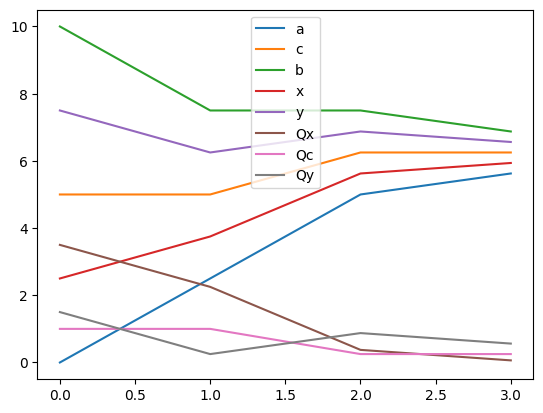

In [26]:
print(dichotomy(Q, a, b, sigma))

In [27]:
def golden_ratio(Q, a, b, sigma, theta):

    df = pd.DataFrame(columns=["a", "b", "x", "y", "Qx", "Qy"])

    y = a + (b - a) * theta
    Qy = Q(y)
    x = b - (b - a) * theta
    Qx = Q(x)
    
    while (b - a) > sigma:
        row = [a, b, x, y, Qx, Qy]
        df.loc[len(df)] = row

        if Qx < Qy:
            b = y
            y = x
            Qy = Qx
            x = b - (b - a) * theta
            Qx = Q(x)

        elif Qy < Qx:
            a = x
            x = y
            Qx = Qy
            y = a + (b - a) * theta
            Qy = Q(y)

    display(df)
    df.plot()
    return (a, b), (Q(a), Q(b))

,a,b,x,y,Qx,Qy
0,0.00000,10.000000,3.800000,6.200000,2.200000,0.200000
1,3.80000,10.000000,6.200000,7.644000,0.200000,1.644000
2,3.80000,7.644000,5.260720,6.200000,0.739280,0.200000
3,5.26072,7.644000,6.200000,6.738354,0.200000,0.738354
4,5.26072,6.738354,5.822221,6.200000,0.177779,0.200000


((5.26072, 6.2), (0.7392799999999999, 0.20000000000000018))


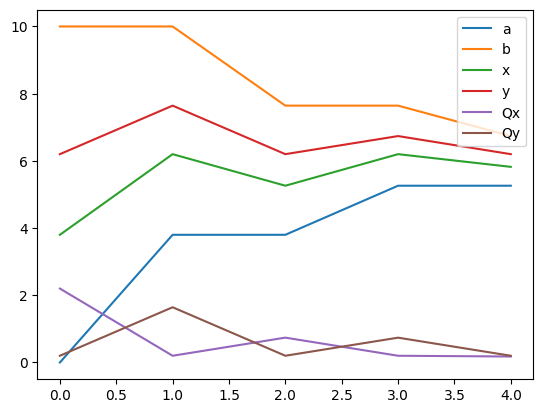

In [28]:
print(golden_ratio(Q, a, b, sigma, theta))

In [29]:
def fibonacci(Q, a, b, sigma, epsilon):

    df = pd.DataFrame(columns=["a", "b", "x", "y", "Qx", "Qy", "k"])

    def fib(x):
        if x == 0 or x == 1:
            return 1
        return fib(x - 1) + fib(x - 2)
    
    N = 0
    while (b - a) / fib(N) + epsilon > sigma:
        N += 1
    print(f"N = {N}")

    x = b - (b - a) * fib(N - 1) / fib(N)
    Qx = Q(x)
    y = a + (b - a) * fib(N - 1) / fib(N)
    Qy = Q(y)
    k = 2
    
    while k < N - 1:
        row = [a, b, x, y, Qx, Qy, k]
        df.loc[len(df)] = row

        if Qx < Qy:
            b = y
            y = x
            Qy = Qx
            x = b - (b - a) * fib(N - k + 1) / fib(N - k + 2)
            Qx = Q(x)
        elif Qx > Qy:
            a = x
            x = y
            Qx = Qy
            y = a + (b - a) * fib(N - k + 1) / fib(N - k + 2)
            Qy = Q(y)
        k += 1

    row = [a, b, x, y, Qx, Qy, k]
    df.loc[len(df)] = row

    if Qx < Qy:
        b = y
        y = x
        Qy = Qx
        x = y - epsilon
        Qx = Q(x)
    elif Qx > Qy:
        a = x
        x = y
        Qx = Qy
        y = x + epsilon
        Qy = Q(y)
    k += 1

    row = [a, b, x, y, Qx, Qy, k]
    df.loc[len(df)] = row

    if Qx < Qy:
        b = y
    elif Qx > Qy:
        a = x

    display(df)
    df.plot()
    return (a, b), (Q(a), Q(b))

N = 6


,a,b,x,y,Qx,Qy,k
0,0.000000,10.000000,3.846154,6.153846,2.153846,0.153846,2.0
1,3.846154,10.000000,6.153846,7.633136,0.153846,1.633136,3.0
2,3.846154,7.633136,5.266272,6.153846,0.733728,0.153846,4.0
3,5.266272,7.633136,6.153846,6.686391,0.153846,0.686391,5.0
4,5.266272,6.686391,6.143846,6.153846,0.143846,0.153846,6.0


((5.266272189349112, 6.153846153846154), (0.7337278106508878, 0.1538461538461542))


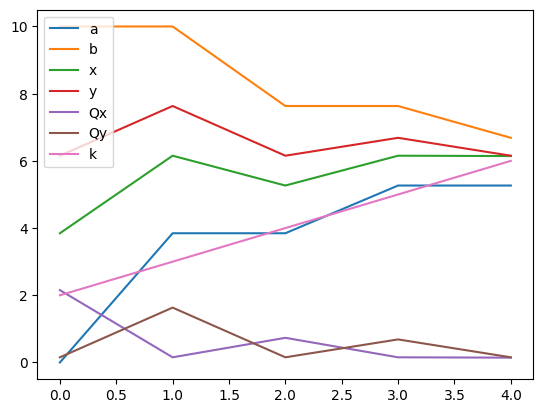

In [30]:
print(fibonacci(Q, a, b, sigma, epsilon))